If you would like to investigate the CNN in different ways, use https://github.com/utkuozbulak/pytorch-cnn-visualizations as a reference.

In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

from visualization_utils import preprocess_image, convert_to_grayscale
from guided_backprop import GuidedBackprop

In [2]:
BASE_DIR = '../..'
TYPE = 'single_country'
COUNTRY = 'malawi_2016'
METRIC = 'house_has_cellphone'
CNN_SAVE_DIR = os.path.join(BASE_DIR, 'models', TYPE, COUNTRY, METRIC)

In [3]:
model = torch.load(os.path.join(CNN_SAVE_DIR, f'trained_model_{METRIC}.pt'), map_location=torch.device('cpu'))
model = model.eval()

In [24]:
os.listdir('images/')

['water.png', 'bad_image.png', '.ipynb_checkpoints', 'roads.png']

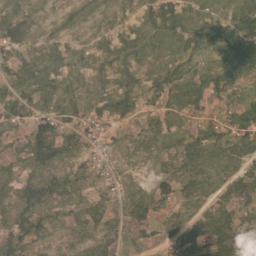

In [51]:
choice = 'roads.png'
image_dir = f'images/{choice}'
image = Image.open(image_dir).convert('RGB')
image

In [52]:
proc_image = preprocess_image(image)

# prediction by model
preds = model(proc_image)
print('prediction:', preds)
target = torch.argmax(preds).item()

prediction: tensor([[-0.0611, -0.1734,  0.6712, -0.0198]], grad_fn=<AddmmBackward>)


In [53]:
GBP = GuidedBackprop(model)
guided_grads = GBP.generate_gradients(proc_image, target)
grayscale_guided_grads = convert_to_grayscale(guided_grads)

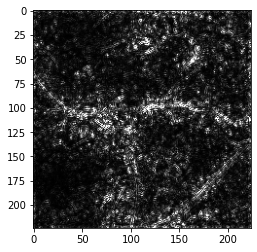

In [54]:
plt.imshow(np.squeeze(grayscale_guided_grads.transpose(1, 2, 0)), cmap='gray', vmin=0, vmax=1)